

### ILEO-CECAL RESECTION IN CROHN’S DISEASE 

## Background 
Crohn's disease is a chronic inflammatory bowel disease that affects the digestive tract. 
Children who have severe Crohn's disease generally undergo surgery, such as an ileo-cecal resection, to remove the diseased section of the colon in hope to relieve some of the symptoms. 
The treatment plan post surgery differs depending on institution standards. Some practices believe that initiating children on anti-tnf therapy, such as infliximab, to control their disease further after surgery will help prevent the disease from re-occuring in the retained healthy sections of the colon.
As of now, there are no studies that prove what causes re-occurence in children with Crohn's post ileo-cecal resection and what may help prevent this. This dataset was gathered to explore possible clinical factors that may be indicators of disease recurrence post surgery. It is also meant to explore whether or not starting children on anti-tnf therapy shortly post surgery will affect whether or not patients have recurrence of disease. 

## Data Collection 

Different types of information such as disease phenotype, disease history, surgical history and medication history was abstracted from patients electronic medical charts. 
Limitations to the data include that not all patients had the required information, thus some rows were left blank (NaN).


## Columns used 
##### coding for data in the database 
##### anti-tnf = 4 
##### group = Recurrence (ER) vs. Nonrecurrence (NER)
##### bio_less2 = patients who started anti-tnf <= 2 months post surgery
##### bio_more2 = patients who started anti-tnf > 2 months post surgery
##### dx_dur = duration of disease from diagnosis to surgery date
##### medstart = start date of medication 
##### surgery_date = date of surgery





In [0]:
#Loading Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
diseasechar=pd.read_csv('class_proj_data.csv')
meds=pd.read_csv('meds2.csv')

In [0]:
diseasechar.head()

,ID,group,sex,ethnicity,rutgeert_1,time_ss1,image_recur,date_surgery1,date_imaging,date_secondsurg,second_surg,date_scope1,date_diagnosis,age_surgery,dx_dur,L1,L2,L3,L4A,L4B,dx_beh,dx_perian,dx_growthfail,srl1,srl2,srl3,srl4a,srl4b,surgbeh,surgperi,surggf,surgmani,trough_level,tnf_therap,tlmeas,elective_urgent,surg_ind,type_surg,abscess,phlegmon,...,ilealdiv,res_length,res_marg,res_inflam,res_granu,res_fibrosis,crp_sc,calpro_sc,1date_calpro_sc,hct_sc,esr_sc,alb_sc,hgb_sc,aPCDAI_sc,wPCDAI_sc,PCDAI_sc,sPCDAI_sc,crp_fu,calpro_fu,1date_calpro_fu,hct_fu,esr_fu,alb_fu,hgb_fu,aPCDAI_fu,wPCDAI_fu,PCDAI_fu,sPCDAI_fu,crp_last,calpro_last,1date_calpro_last,hct_last,esr_last,alb_last,hgb_last,aPCDAI_last,wPCDAI_last,PCDAI_last,sPCDAI_last,fu_since_surgery
0,1.0,ER,0.0,1.0,2.0,9.63,0.0,5/17/2016,1/4/2017,NaN,0.0,3/6/2017,5/25/2005,19.1,11.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,NaN,NaN,0.0,1.0,2.0,1.0,0.0,0.0,...,0.0,53.0,NaN,3.0,1.0,4.0,0.0,172.0,1/5/2017,34.0,4.0,4.0,11.7,20.0,45.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,32.5,30.00,NaN,NaN,39.0,11.0,4.1,12.6,15.0,27.5,15.0,17.5,1.99
1,2.0,NER,1.0,1.0,1.0,25.07,NaN,7/14/2015,NaN,NaN,0.0,8/15/2017,6/3/2011,18.3,4.1,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,9.7,1.0,1.0,1.0,2.0,1.0,0.0,0.0,...,0.0,19.0,1.0,3.0,0.0,3.0,0.2,NaN,NaN,44.0,12.0,4.2,15.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,44.6,5.0,4.2,15.2,0.0,0.0,0.0,0.0,0.17,NaN,NaN,43.0,6.0,4.7,15.0,0.0,0.0,0.0,0.0,2.86
2,3.0,NER,1.0,1.0,1.0,3.74,1.0,1/13/2015,1/5/2017,NaN,0.0,5/7/2015,7/30/2014,16.2,0.5,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,0.0,1.0,2.0,1.0,0.0,1.0,...,0.0,12.0,0.0,3.0,0.0,3.0,0.0,NaN,NaN,31.8,4.0,4.3,9.6,5.0,7.5,10.0,7.5,2.6,NaN,NaN,34.0,16.0,4.1,10.3,5.0,7.5,7.5,7.5,NaN,NaN,NaN,39.0,14.0,4.7,13.9,0.0,0.0,0.0,0.0,3.24
3,4.0,ER,0.0,1.0,2.0,2.17,0.0,5/19/2015,7/15/2015,12/15/2015,1.0,7/24/2015,2/29/2012,17.9,3.2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,0.0,1.0,2.0,1.0,0.0,0.0,...,0.0,23.0,0.0,3.0,1.0,4.0,1.6,NaN,NaN,35.6,25.0,4.0,11.6,10.0,30.0,17.5,22.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.65,NaN,NaN,37.3,13.0,4.0,12.7,10.0,22.5,15.0,22.5,0.58
4,5.0,NER,1.0,1.0,1.0,6.80,NaN,7/30/2015,NaN,NaN,0.0,2/22/2016,3/10/2014,15.2,1.4,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,...,0.0,45.0,NaN,3.0,0.0,3.0,0.6,NaN,NaN,39.7,NaN,4.4,12.6,0.0,NaN,NaN,0.0,1.0,NaN,NaN,39.2,5.0,4.4,12.7,0.0,0.0,0.0,0.0,1.60,NaN,NaN,38.9,13.0,4.1,12.1,0.0,0.0,0.0,0.0,2.77


In [0]:
meds.head()

,study_id,id,med_cat,dx,surg,1yr,last_fu,post_op,scope_postup,before_surg,medstart,medend,dx_date,date_surgery,date_surgery2,scopedate,bio_less2,bio_more2,last_biologic
0,1,1,5,0,5,0,0,0,0,5,6/9/2013,8/9/2013,5/25/2005,5/17/2016,5/17/2016,3/6/2017,0.0,0.0,NaN
1,1,1,4,0,4,4,0,4,4,4,8/7/2009,5/13/2018,5/25/2005,5/17/2016,5/17/2016,3/6/2017,1.0,0.0,5/3/2018
2,1,1,3,0,0,0,3,3,0,0,5/15/2018,NaN,5/25/2005,5/17/2016,5/17/2016,3/6/2017,0.0,0.0,NaN
3,2,2,4,4,4,4,4,4,4,0,6/4/2011,NaN,6/3/2011,7/14/2015,7/14/2015,8/15/2017,1.0,0.0,NaN
4,2,2,7,0,7,0,0,0,0,7,5/8/2015,7/1/2015,6/3/2011,7/14/2015,7/14/2015,8/15/2017,0.0,0.0,NaN


In [0]:
#Merge 2 datasets together based on column ID
alldata=pd.merge(meds, diseasechar, left_on = 'id', right_on = 'ID', how='inner')
alldata.head()

,study_id,id,med_cat,dx,surg,1yr,last_fu,post_op,scope_postup,before_surg,medstart,medend,dx_date,date_surgery,date_surgery2,scopedate,bio_less2,bio_more2,last_biologic,ID,group,sex,ethnicity,rutgeert_1,time_ss1,image_recur,date_surgery1,date_imaging,date_secondsurg,second_surg,date_scope1,date_diagnosis,age_surgery,dx_dur,L1,L2,L3,L4A,L4B,dx_beh,...,ilealdiv,res_length,res_marg,res_inflam,res_granu,res_fibrosis,crp_sc,calpro_sc,1date_calpro_sc,hct_sc,esr_sc,alb_sc,hgb_sc,aPCDAI_sc,wPCDAI_sc,PCDAI_sc,sPCDAI_sc,crp_fu,calpro_fu,1date_calpro_fu,hct_fu,esr_fu,alb_fu,hgb_fu,aPCDAI_fu,wPCDAI_fu,PCDAI_fu,sPCDAI_fu,crp_last,calpro_last,1date_calpro_last,hct_last,esr_last,alb_last,hgb_last,aPCDAI_last,wPCDAI_last,PCDAI_last,sPCDAI_last,fu_since_surgery
0,1,1,5,0,5,0,0,0,0,5,6/9/2013,8/9/2013,5/25/2005,5/17/2016,5/17/2016,3/6/2017,0.0,0.0,NaN,1.0,ER,0.0,1.0,2.0,9.63,0.0,5/17/2016,1/4/2017,NaN,0.0,3/6/2017,5/25/2005,19.1,11.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,53.0,NaN,3.0,1.0,4.0,0.0,172.0,1/5/2017,34.0,4.0,4.0,11.7,20.0,45.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,32.5,30.00,NaN,NaN,39.0,11.0,4.1,12.6,15.0,27.5,15.0,17.5,1.99
1,1,1,4,0,4,4,0,4,4,4,8/7/2009,5/13/2018,5/25/2005,5/17/2016,5/17/2016,3/6/2017,1.0,0.0,5/3/2018,1.0,ER,0.0,1.0,2.0,9.63,0.0,5/17/2016,1/4/2017,NaN,0.0,3/6/2017,5/25/2005,19.1,11.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,53.0,NaN,3.0,1.0,4.0,0.0,172.0,1/5/2017,34.0,4.0,4.0,11.7,20.0,45.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,32.5,30.00,NaN,NaN,39.0,11.0,4.1,12.6,15.0,27.5,15.0,17.5,1.99
2,1,1,3,0,0,0,3,3,0,0,5/15/2018,NaN,5/25/2005,5/17/2016,5/17/2016,3/6/2017,0.0,0.0,NaN,1.0,ER,0.0,1.0,2.0,9.63,0.0,5/17/2016,1/4/2017,NaN,0.0,3/6/2017,5/25/2005,19.1,11.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,53.0,NaN,3.0,1.0,4.0,0.0,172.0,1/5/2017,34.0,4.0,4.0,11.7,20.0,45.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,32.5,30.00,NaN,NaN,39.0,11.0,4.1,12.6,15.0,27.5,15.0,17.5,1.99
3,2,2,4,4,4,4,4,4,4,0,6/4/2011,NaN,6/3/2011,7/14/2015,7/14/2015,8/15/2017,1.0,0.0,NaN,2.0,NER,1.0,1.0,1.0,25.07,NaN,7/14/2015,NaN,NaN,0.0,8/15/2017,6/3/2011,18.3,4.1,1.0,0.0,0.0,1.0,0.0,2.0,...,0.0,19.0,1.0,3.0,0.0,3.0,0.2,NaN,NaN,44.0,12.0,4.2,15.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,44.6,5.0,4.2,15.2,0.0,0.0,0.0,0.0,0.17,NaN,NaN,43.0,6.0,4.7,15.0,0.0,0.0,0.0,0.0,2.86
4,2,2,7,0,7,0,0,0,0,7,5/8/2015,7/1/2015,6/3/2011,7/14/2015,7/14/2015,8/15/2017,0.0,0.0,NaN,2.0,NER,1.0,1.0,1.0,25.07,NaN,7/14/2015,NaN,NaN,0.0,8/15/2017,6/3/2011,18.3,4.1,1.0,0.0,0.0,1.0,0.0,2.0,...,0.0,19.0,1.0,3.0,0.0,3.0,0.2,NaN,NaN,44.0,12.0,4.2,15.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,44.6,5.0,4.2,15.2,0.0,0.0,0.0,0.0,0.17,NaN,NaN,43.0,6.0,4.7,15.0,0.0,0.0,0.0,0.0,2.86


Text(0, 0.5, 'Total n of Patients')

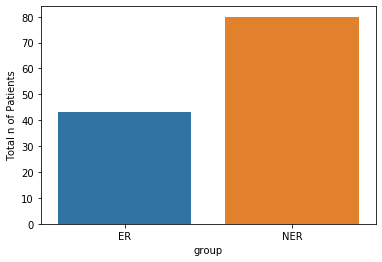

In [0]:
#Looking at number of patients in each group
plot2=sbn.countplot(diseasechar['group'])
plot2.set_ylabel('Total n of Patients')

Based on this Figure, there are almost twice as many NER patients compared to ER patients in this dataset. 

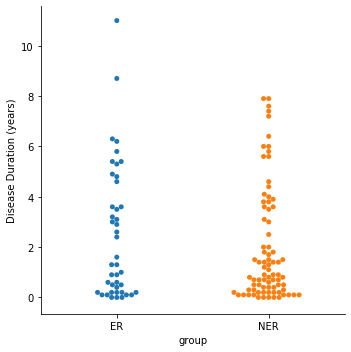

In [0]:
## Looking at how disease duration (time of diagnosis to time of surgery) is between recurrence and non-recurrence. 
plot=sbn.catplot(data=diseasechar,
            x="group",
            y="dx_dur",
            kind="swarm"
             )
plot.set_ylabels('Disease Duration (years)')

In [0]:
## What is the mean disease duration in each group? 
ER=diseasechar.query('group=="ER"')
NER=diseasechar.query('group =="NER"')

print('ER disease duration in years:',ER.dx_dur.mean())
print('NER disease duration in years:', NER.dx_dur.mean())

ER disease duration in years: 2.495348837209302
NER disease duration in years: 1.9949999999999997


Looking at the duration of disease is important, as kids who have had a disease for a longer period of time could naturally have more severe disease and thus have recurrence of disease. Looking at this figure and the means, this does not seem to be the case in the dataset. 

Text(0, 0.5, 'Total n of patients')

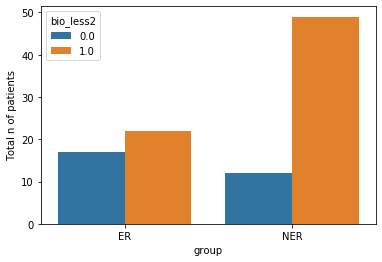

In [0]:
## Look at how many patients started tnf <= 2 months post surgery and > 2 months post surgery
# bio_less = 0 : did not start <= 2months post surgery 

#Filter to all patients who were on anti-tnf (4) post surgery 
tnfpostop=alldata.query('post_op == "4"')
plot4=sbn.countplot(tnfpostop['group'],
              hue = tnfpostop['bio_less2'])

plot4.set_ylabel('Total n of patients')

This figure tells us how many patients started antitnf therapy at or before 2 months post surgery (orange bar graph). First we queried the dataset to look at all patients who were on TNF post surgery. In ER ~60% started TNF in that time range. In NER ~80% started TNF in that time range. 

In [0]:
## When a patient undergoes surgery, the time clock for their disease restarts because the diseased part of the colon is removed. 
## I want to explore whether time on tnf leading up to surgery is different between recurrence and non-reccurence 

#Filter to patients who were on anti-tnf before surgery and still on it at time of surgery
tnfsurg=alldata.query('before_surg =="4" & surg == "4"')

d1=pd.to_datetime(tnfsurg['date_surgery'])
d2=pd.to_datetime(tnfsurg['medstart'])
#Calculate duration of anti-tnf prior to surgery and store in delta 
delta=d1-d2
tnfsurg['tnf_dur']=delta
tnfsurg['tnf_dur'] = tnfsurg['tnf_dur'] / np.timedelta64(1, 'D')



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


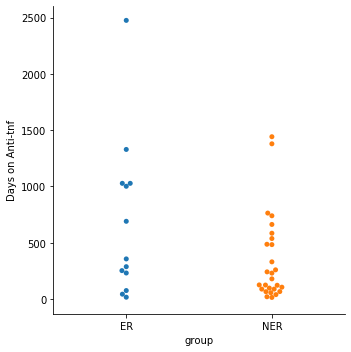

In [0]:
plot=sbn.catplot(data=tnfsurg,
                 x="group",
                 y="tnf_dur",
                 kind = "swarm")

plot.set_ylabels('Days on Anti-tnf')


In [0]:
ER=tnfsurg.query('group =="ER"')
NER= tnfsurg.query('group == "NER"')
print(ER['tnf_dur'].mean())
print(NER['tnf_dur'].mean())

print(ER['tnf_dur'].median())
print(NER['tnf_dur'].median())



678.4615384615385
346.22222222222223
357.0
180.0


Based on the mean and medians of tnf duration prior to surgery for ER and NER patients, ER patients had a higher average number of days of exposure to TNF prior to surgery. This could indicate that duration of exposure to TNF prior to surgery does not really play a major factor in recurrence.

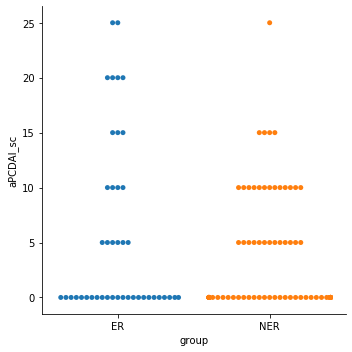

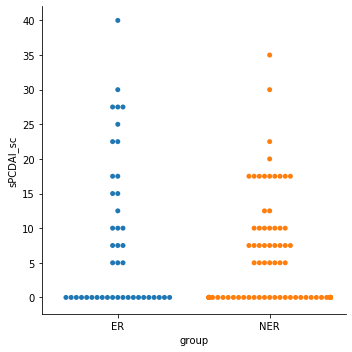

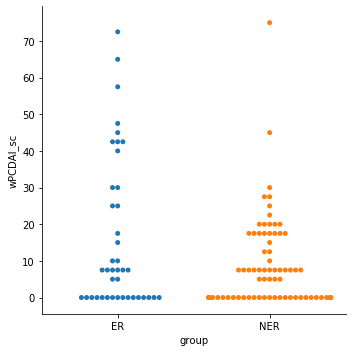

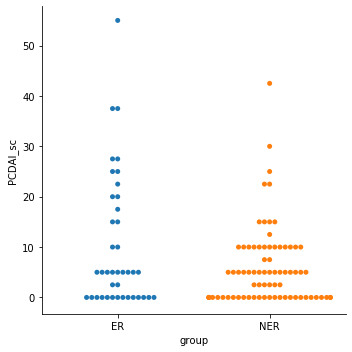

In [0]:
## Do the four activity index's taken at 1st scope post surgery help identify recurrence vs non-recurrence 

sbn.catplot(data=diseasechar,
            x="group",
            y="aPCDAI_sc",
            kind = "swarm")
sbn.catplot(data=diseasechar,
            x="group",
            y="sPCDAI_sc",
            kind = "swarm")
sbn.catplot(data=diseasechar,
            x="group",
            y="wPCDAI_sc",
            kind = "swarm")
sbn.catplot(data=diseasechar,
            x="group",
            y="PCDAI_sc",
            kind = "swarm")


Based on the above figures, it doesn't seem that there are much differences in disease activity scores between ER and NER patients. 

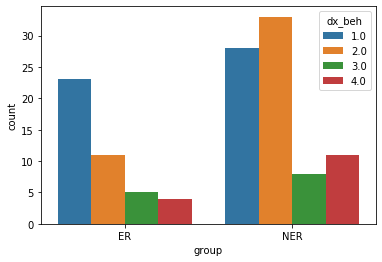

In [0]:
# Disease Behavior Code 
## 1: Non-stricturing Non-penetrating
## 2: Stricturing
## 3: Pentrating
## 4: Stricturing and Penetrating 
## Having a 4 is most severe disease 
plot2=sbn.countplot(diseasechar['group'],
                    hue=diseasechar['dx_beh'])

Looking at the figures for disease behavoir at diagnosis, both ER and NER patients seem to fall in groups 1 and 2 of disease behavior. ~25% of ER and ~ 25% of NER patients have 3 and 4 disease behavior. 

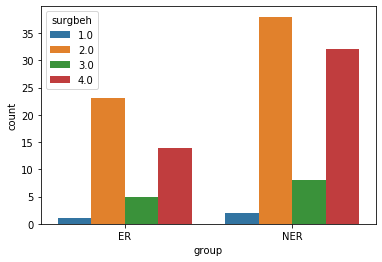

In [0]:
plot2=sbn.countplot(diseasechar['group'],
                    hue=diseasechar['surgbeh'])

Based on surgery disease behavior, it seemed that the seperation of disease behavior was different when looking at the surgical specimen. Percentage wise, doesn't seem to be a difference between NER and ER. 50% of ER and NER patients fell into the 1-2 disease behavior group. 

Hypothesis: Starting Anti-tnf therapy shortly post surgery can decrease recurrence of disease in patients post ileo-cecal resection. 

Null Hypothesis to reject: 
1. There is no difference in exposure time to antitnf post surgery between ER and NER patients

2. There is no difference in patients who started anti-tnf <=2 months post surgery between ER and NER groups. 

Alternative Hypothesis:
We have patients with more severe disease in the ER group thus recurrence post ileo-cecal resection is not due to them being on any sort of medication but it due to them having more severe disease to begin with. 